# Demo PINning ntwk

Example RNN training with RLS to match sequence target
August 30, 2021

Vyom Raval
vyomr@uw.edu

In [6]:
import brian2 as b2
import numpy as np
import matplotlib.pyplot as plt

import PIN_ntwk as pn
from utils import generate_target_seq, get_pvar

## Generate target sequence

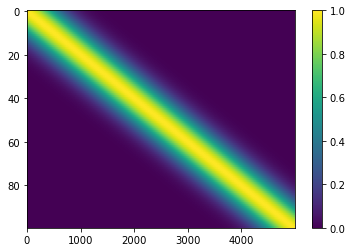

In [2]:
N_neurons = 100
duration = 5*b2.second
dt = 1*b2.ms
n_timesteps = int(duration/dt)

arr_rates_ideal, arr_target_fx = generate_target_seq(N_neurons, n_timesteps, dt, std=0.3)

plt.imshow(arr_rates_ideal, aspect='auto')
plt.colorbar()

## Create and train RNN
I have implemented 3 different error functions (specified by the `rule` parameter in the `train` method). In general, setting `rule` to 'rate' works best--it optimizes RNN model neuron output rates directly wrt target rates. 

In [3]:
tau_neuron = 10*b2.ms
c_net = pn.PIN_ntwk(N_neurons, tau_neuron, duration, dt, n_timesteps, 
                    g_wt_variance=1.5, theta=0, seed=0)

c_net.generate_frozen_external_input(tau_wn=1*b2.second, h0_wn=1)
c_net.generate_weights()

Train for 21 steps with 100% plastic synapses, plotting outputs and dJ (weight matrix update) at every 5 steps

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:26<00:00,  1.24s/it]


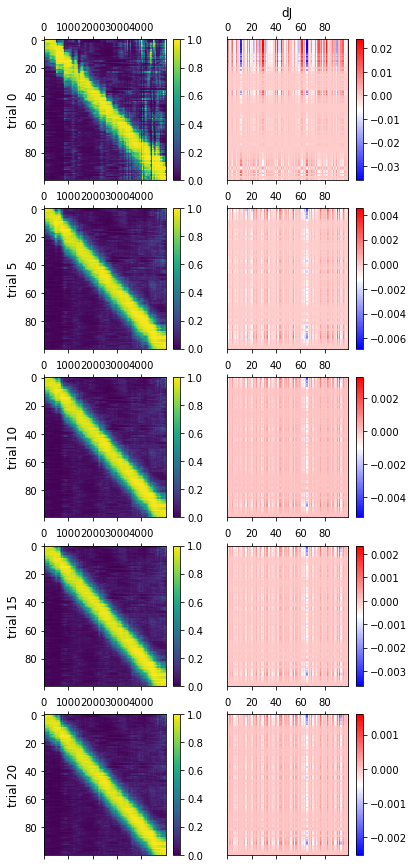

In [4]:
c_net.train(arr_target_fx=arr_rates_ideal, p_plastic=1, alpha=1, n_training_steps=21, n_plot_every=5,
            rule='rate', seed=0, b_inject_noise=False, amp_noise=0)

Run network with learning turned off to see performance of learned weight matrix

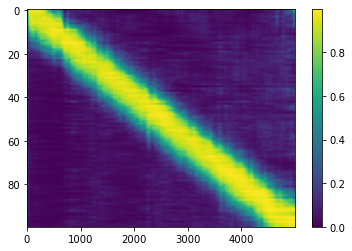

In [5]:
test_output = c_net.run(arr_rates_ideal, rule='rate')

# Plot output rates
plt.imshow(test_output[1], aspect='auto')
plt.colorbar()

Compute percent variance of target rates explained by trained RNN (pVar, see Rajan (2016) for details)

In [7]:
get_pvar(arr_rates_ideal, test_output[1])

0.8039950943227309

Visualize learned weight matrix and its band structure

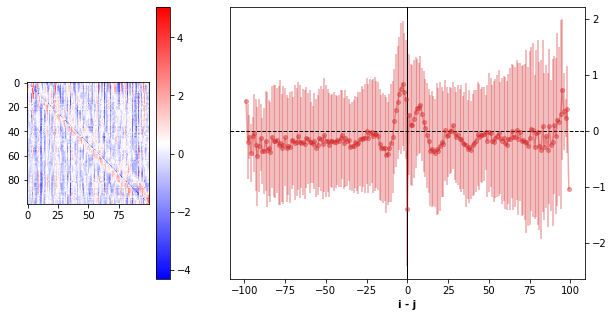

In [8]:
c_net.plot_band_structure()

Compare with Fig 3D and E in Rajan (2016)